# **Importing the basic dependencies**

In [ ]:
# Import essential numerical and data manipulation libraries
import numpy as np
import pandas as pd

# **Importing the data**

In [ ]:
# Load the Reddit sentiment analysis dataset from GitHub and display the first few rows
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


Checking basic info

In [ ]:
# Check the shape (rows and columns) of the dataset
df.shape

(37249, 2)

In [ ]:
# Display statistical summary of numerical columns in the dataset
df.describe()

,category
count,37249.000000
mean,0.202771
std,0.778515
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
# Display comprehensive info about the dataset including data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


# **Cleaning the data**

In [ ]:
# Check the count of missing/null values in each column
df.isnull().sum()

,0
clean_comment,100
category,0


basically 100 missing values

In [ ]:
# Display rows with missing values in the 'clean_comment' column
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [ ]:
# Check the distribution of sentiment categories in rows with missing comments
df[df['clean_comment'].isna()]['category'].value_counts()

,count
category,
0,100


I can drop 100 rows because we have nearly 37000 rows.

In [ ]:
# Remove rows with missing values from the dataset
df.dropna(inplace=True)

In [ ]:
# Count the number of duplicate rows in the dataset
df.duplicated().sum()

np.int64(350)

In [ ]:
# Display the duplicate rows in the dataset
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [ ]:
# Remove duplicate rows from the dataset
df.drop_duplicates(inplace=True)

In [ ]:
# Verify that all duplicates have been removed
df.duplicated().sum()

np.int64(0)

In [ ]:
# Find and display rows with empty or whitespace-only comments
df[(df['clean_comment'].str.strip()=="")]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [ ]:
# Remove rows where comments are empty or contain only whitespace
df = df[~(df['clean_comment'].str.strip()=="")]

In [ ]:
# Convert all text in comments to lowercase and display sample rows
df['clean_comment'] = df['clean_comment'].str.lower()
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
# Find comments with leading or trailing whitespace
df[df['clean_comment'].apply(lambda x: x.startswith(' ') or x.endswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
# Strip leading and trailing whitespace from all comments
df['clean_comment'] = df['clean_comment'].str.strip()

In [ ]:
# Verify that no comments with leading/trailing whitespace remain
df[df['clean_comment'].apply(lambda x: x.startswith(' ') or x.endswith(' '))].sum()

,0
clean_comment,0
category,0


In [ ]:
# Find comments containing URLs using regex pattern
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_url = df[df['clean_comment'].str.contains(url_pattern)]

In [ ]:
# Display sample comments containing URLs
comments_with_url.head()

,clean_comment,category


In [ ]:
# Find and display comments containing newline characters
comments_with_newline = df[df['clean_comment'].str.contains('\n')]
comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [ ]:
# Replace newline characters with spaces and verify the replacement was successful
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)

comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n')]
comments_with_newline_remaining.head()

,clean_comment,category


# **EDA**

In [ ]:
# Import visualization libraries for exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='category', ylabel='count'>

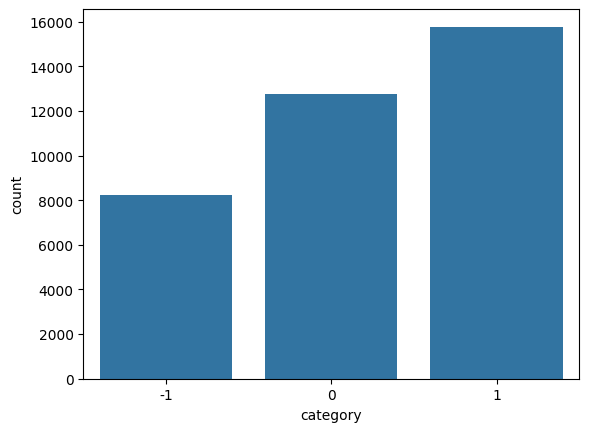

In [ ]:
# Create a count plot showing the distribution of sentiment categories
sns.countplot(data=df, x='category')

In [ ]:
# Display the normalized frequency distribution of sentiment categories as percentages
df['category'].value_counts(normalize=True).mul(100).round(2)

,proportion
category,
1,42.86
0,34.71
-1,22.42


In [ ]:
# Create a new column 'word_count' that counts the number of words in each comment
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [ ]:
# Display a random sample of 5 rows to verify the word count column
df.sample(5)

,clean_comment,category,word_count
12138,this sort shit can well bjp wants congress muk...,1,23
1684,local government deals operational level examp...,1,73
30577,didn have years remove terrorism poverty and c...,1,76
972,biggest voting brigade here set india mods the...,0,8
17064,depends local candidate far can see congress h...,1,14


In [ ]:
# Display statistical summary of the word count distribution
df['word_count'].describe()

,word_count
count,36793.000000
mean,29.667464
std,56.790738
min,1.000000
25%,6.000000
50%,13.000000
75%,30.000000
max,1307.000000


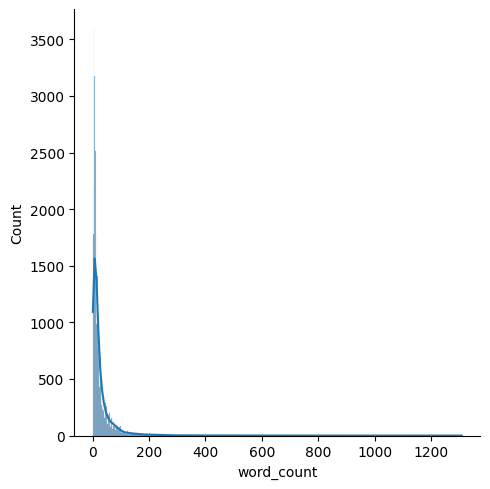

In [ ]:
# Create a distribution plot of word counts with kernel density estimation
sns.displot(df['word_count'], kde=True)

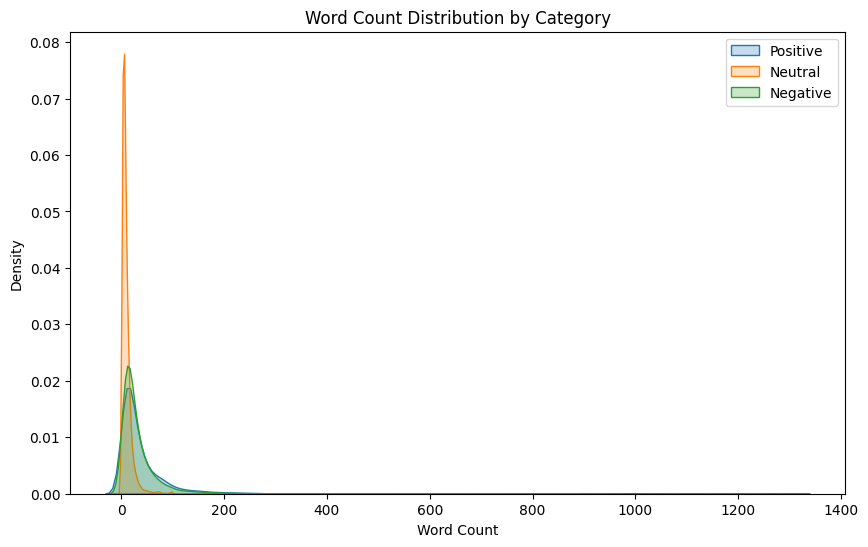

In [ ]:
# Create overlaid KDE plots comparing word count distribution across sentiment categories
plt.figure(figsize=(10, 6))

# Plot KDE for each sentiment category
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend()
plt.show()

<Axes: ylabel='word_count'>

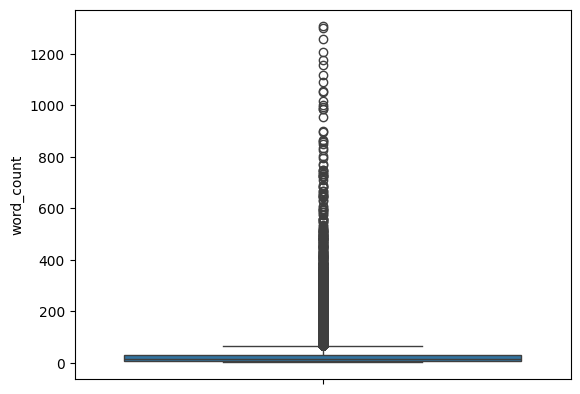

In [ ]:
# Create a boxplot showing the distribution of word counts across all data
sns.boxplot(df['word_count'])

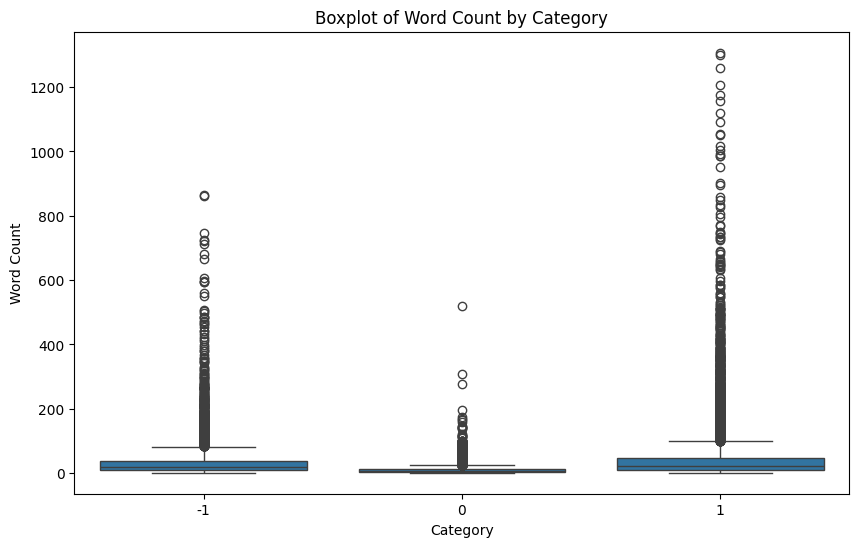

In [ ]:
# Create a boxplot comparing word count distributions across sentiment categories
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

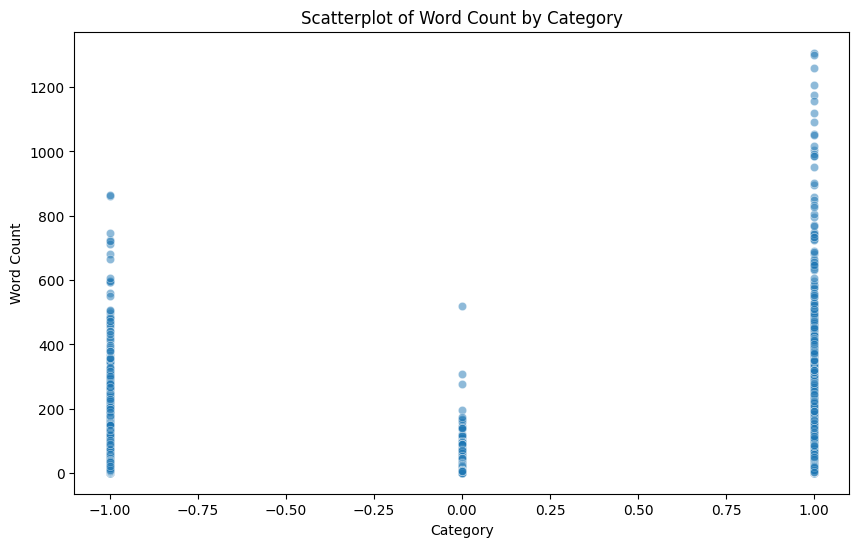

In [ ]:
# Create a scatterplot showing word count distribution by sentiment category
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='category', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

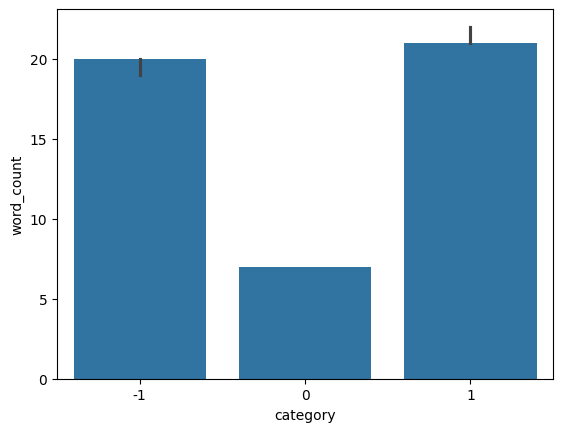

In [ ]:
# Create a barplot showing median word counts for each sentiment category
sns.barplot(df, x='category', y='word_count', estimator='median')

In [ ]:
# Install the NLTK library for natural language processing tasks
!pip install nltk

In [ ]:
# Download and load English stopwords, then count occurrences in each comment
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Create a new column counting the number of stopwords in each comment
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Display a random sample of rows to verify the stopword count column
df.sample(5)

,clean_comment,category,word_count,Num_stop_words,num_stop_words
35815,damn modi such attention seeking chap,0,6,1,1
24266,lost abvp youth didn even recover for amit shah,0,9,2,2
29289,summaries very well worth min watch,1,6,1,1
14516,liberals get salty when president shakes peopl...,1,16,4,4
7218,wow that sounds like tough life maybe you can ...,1,196,85,85


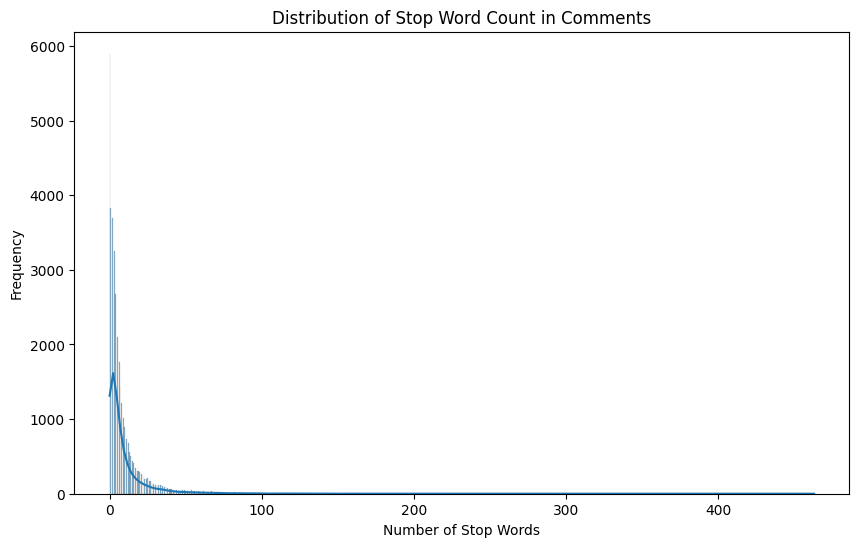

In [ ]:
# Create a histogram showing the distribution of stopword counts in comments
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

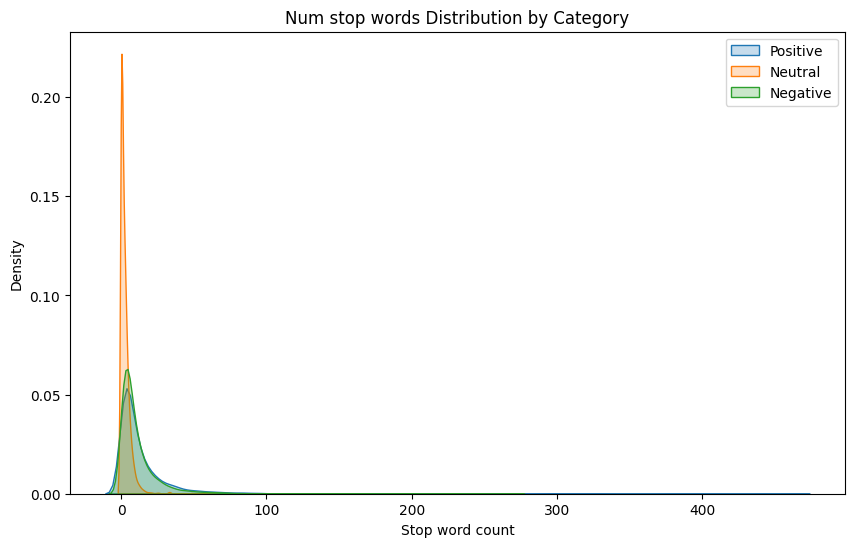

In [ ]:
# Create overlaid KDE plots comparing stopword count distribution across sentiment categories
plt.figure(figsize=(10, 6))

# Plot KDE for each sentiment category
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True)
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True)
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')
plt.legend()
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

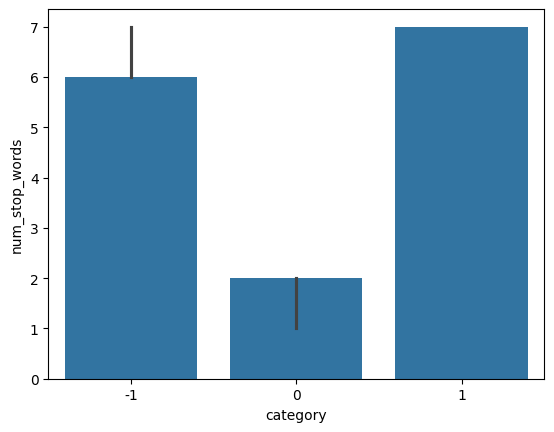

In [ ]:
# Create a barplot showing median stopword counts for each sentiment category
sns.barplot(df, x='category', y='num_stop_words', estimator='median')

/tmp/ipython-input-995200001.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


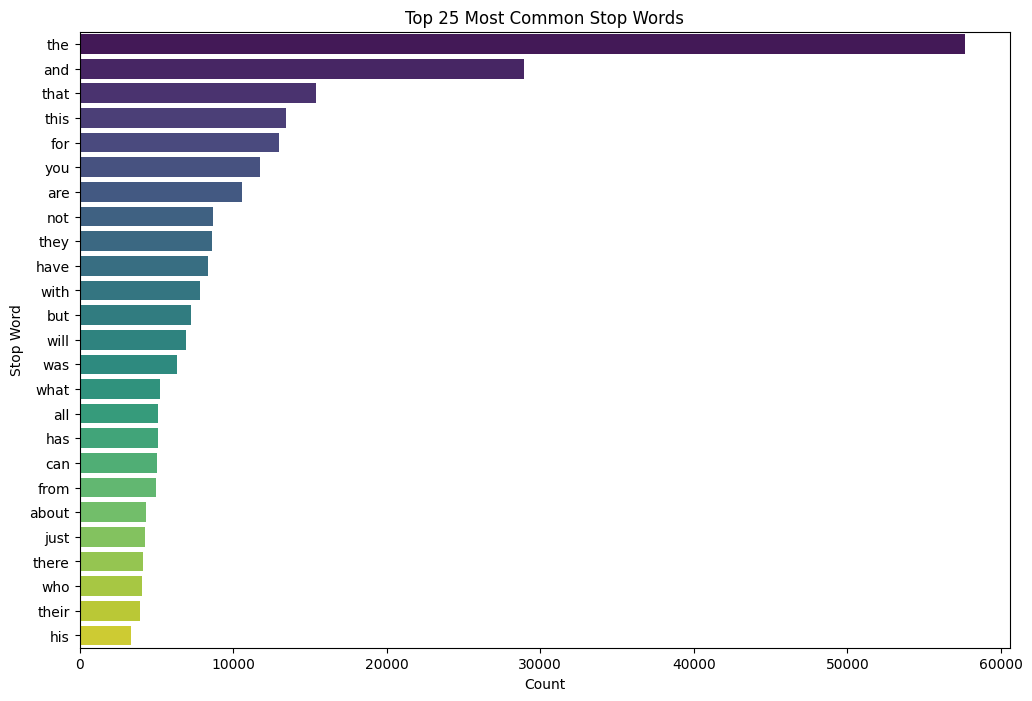

In [ ]:
# Find and visualize the top 25 most common stopwords in the dataset
from collections import Counter

# Extract all stopwords from the comments
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# Count the most common stopwords
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the results to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create a barplot for the top 25 most common stopwords
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()

In [ ]:
# Create a new column 'num_chars' that counts the number of characters in each comment
df['num_chars'] = df['clean_comment'].apply(len)

df.head()

,clean_comment,category,word_count,Num_stop_words,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,59,1268
2,seriously don say thing first all they won get...,-1,86,40,40,459
3,what you have learned yours and only yours wha...,0,29,15,15,167
4,for your own benefit you may want read living ...,1,112,45,45,690


In [ ]:
# Display statistical summary of character count distribution
df['num_chars'].describe()

,num_chars
count,36793.000000
mean,181.852798
std,359.702163
min,1.000000
25%,38.000000
50%,80.000000
75%,184.000000
max,8664.000000


In [ ]:
# Analyze the frequency distribution of all characters in the dataset
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame and sort by frequency
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

In [ ]:
# Display all unique characters found in the dataset
char_frequency_df['character'].values

array([' ', 'e', 't', ..., '段', '她', '谁'], dtype=object)

In [ ]:
# Create a new column 'num_punctuation_chars' to count punctuation in each comment
df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,clean_comment,category,word_count,Num_stop_words,num_stop_words,num_chars,num_punctuation_chars
32295,sir please find teacher this any other forum n...,1,63,28,28,383,0
35828,such pointless cartoons only create more ‘libe...,1,55,23,23,361,0
31575,idk was about making your countrymen feel good...,1,24,8,8,159,0
18786,well hope they serve chai with,0,6,2,2,30,0
21479,pradhan chodu garbage human non recyclable gar...,0,8,1,1,55,0


In [ ]:
# Display statistical summary of punctuation character counts
df['num_punctuation_chars'].describe()

,num_punctuation_chars
count,36793.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


/tmp/ipython-input-1638384091.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


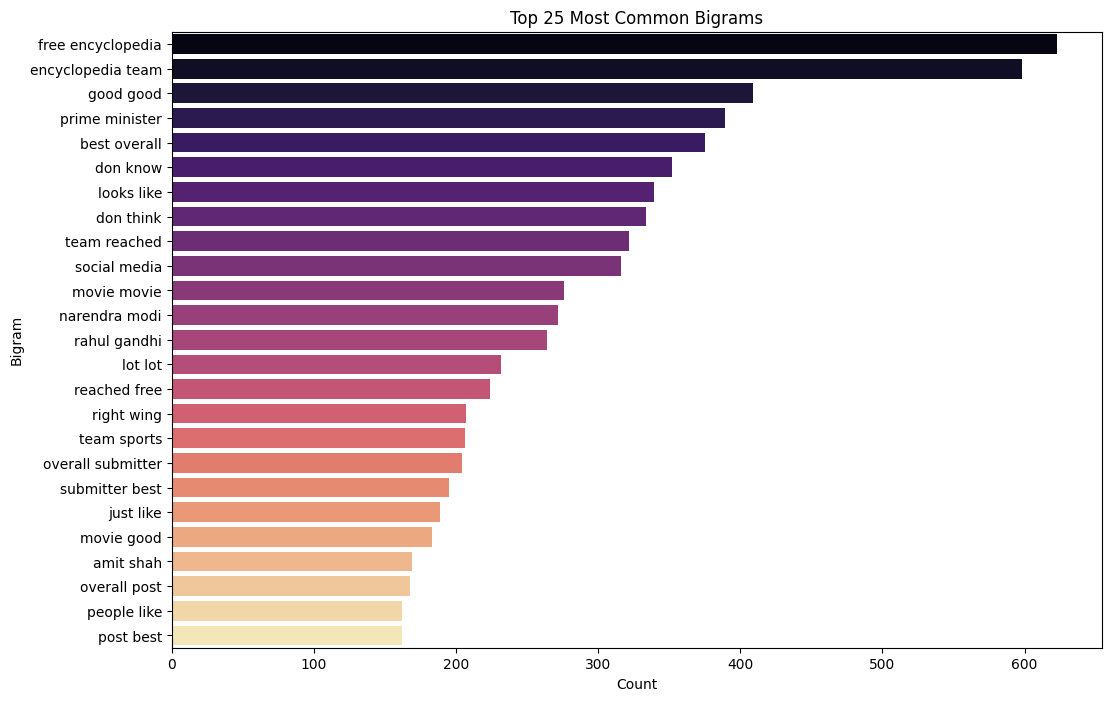

In [ ]:
# Find and visualize the top 25 most common bigrams (2-word phrases) in the dataset
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top N bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Create a barplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

/tmp/ipython-input-3953415821.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


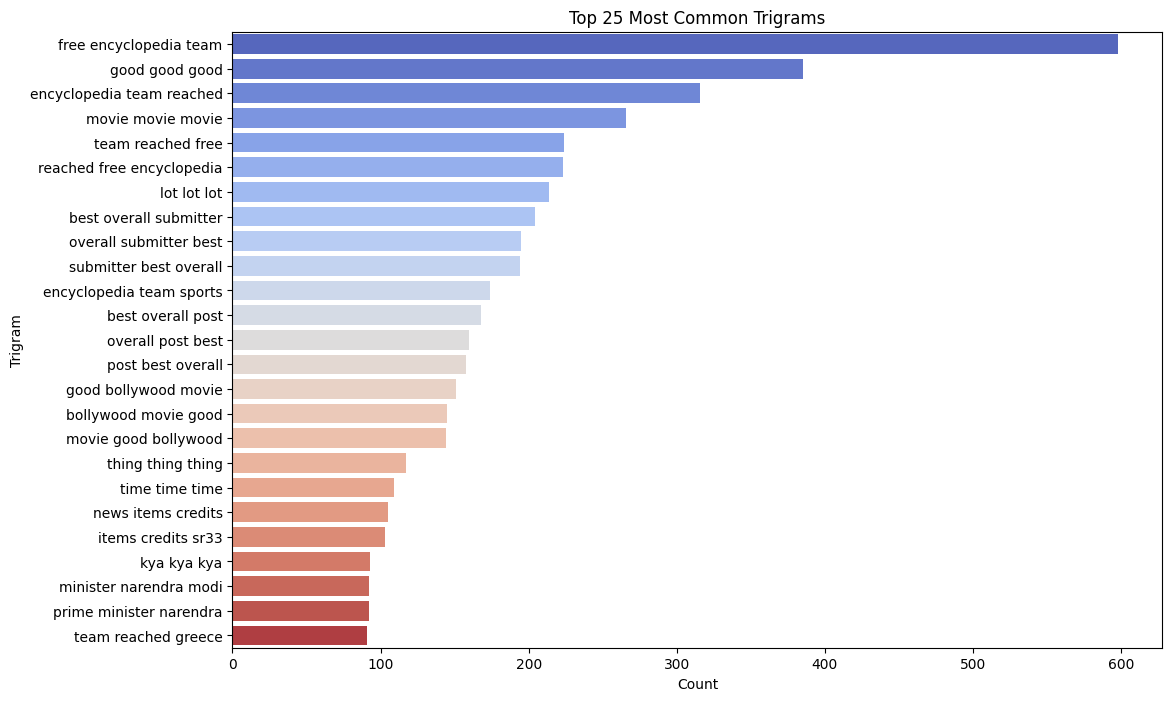

In [ ]:
# Find and visualize the top 25 most common trigrams (3-word phrases) in the dataset
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Create a barplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [ ]:
# Remove non-English characters, keeping only letters, digits, and common punctuation
import re

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [ ]:
# Reanalyze the character frequency distribution after removing non-English characters
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame and sort by frequency
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [ ]:
# Display a sample of the cleaned comments
df.head()

,clean_comment,category,word_count,Num_stop_words,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,15,167,0
4,for your own benefit you may want read living ...,1,112,45,45,690,0


In [ ]:
# Remove stopwords while retaining words important for sentiment analysis (like 'not', 'but')
from nltk.corpus import stopwords

# Define stopwords but exclude sentiment-important words
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stopwords from comments
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

In [ ]:
# Display a sample of comments after stopword removal
df.head()

,clean_comment,category,word_count,Num_stop_words,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,45,690,0


In [ ]:
# Apply lemmatization to convert words to their base forms
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to normalize word forms
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,clean_comment,category,word_count,Num_stop_words,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,45,690,0


In [ ]:
# Drop the unused 'Num_stop_words' column and display the cleaned dataset
df.drop(columns=['Num_stop_words'], inplace=True)
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


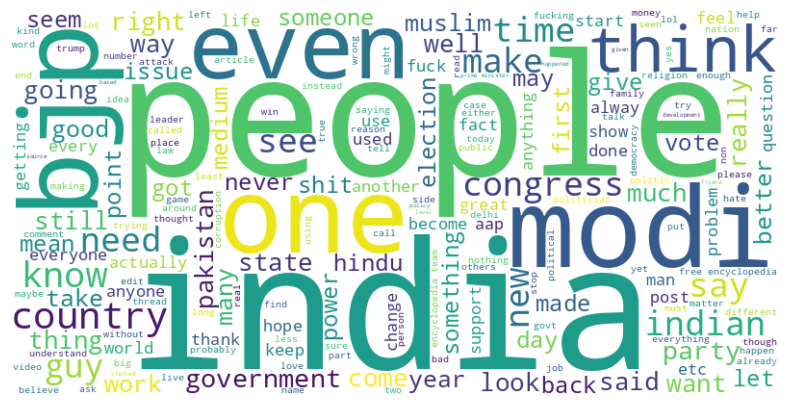

In [ ]:
# Create and display a word cloud showing the most frequently used words in the entire dataset
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['clean_comment'])

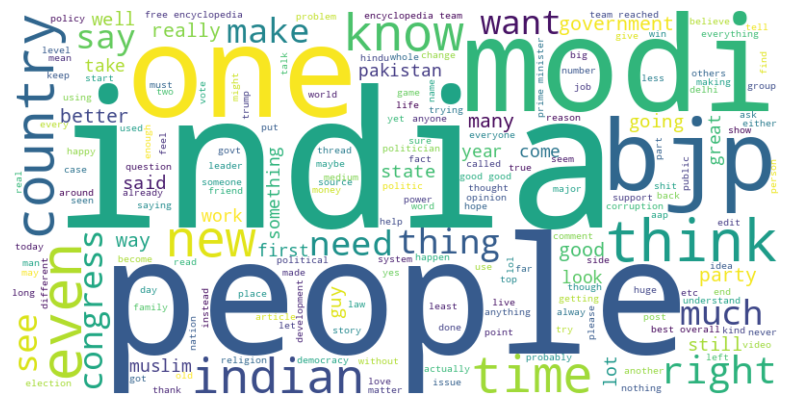

In [ ]:
# Create and display a word cloud for positive sentiment comments (category = 1)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 1]['clean_comment'])

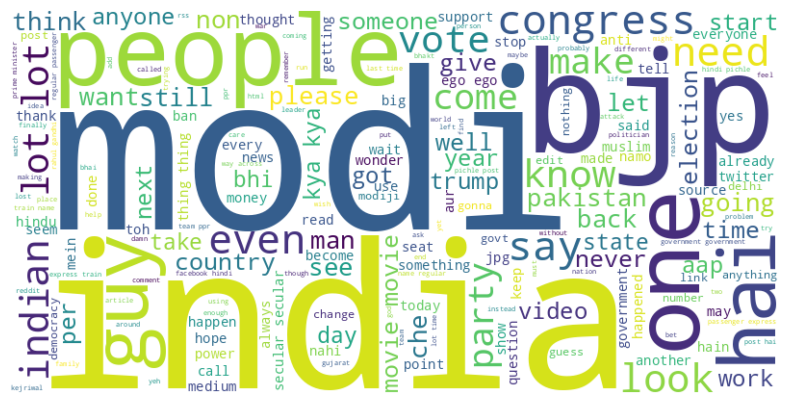

In [ ]:
# Create and display a word cloud for neutral sentiment comments (category = 0)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 0]['clean_comment'])

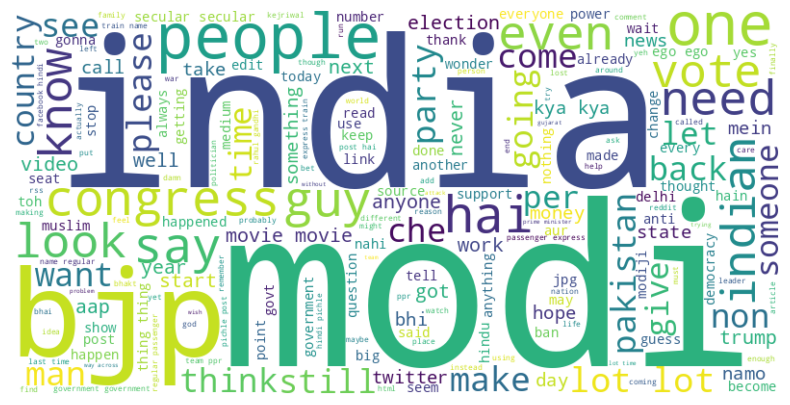

In [ ]:
# Create and display a word cloud for neutral sentiment comments (category = 0) - duplicate
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 0]['clean_comment'])

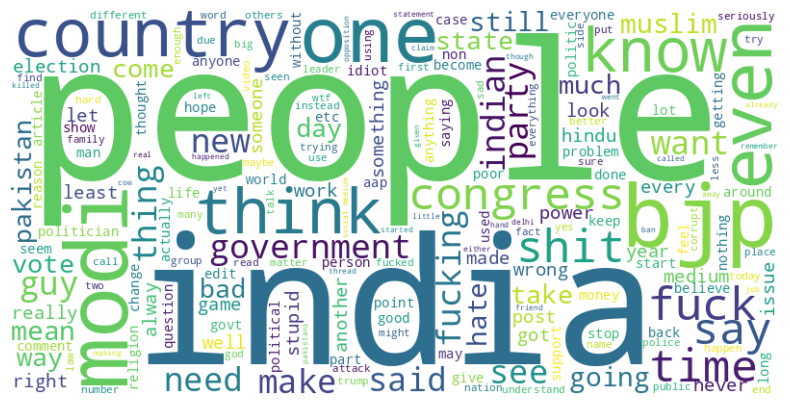

In [ ]:
# Create and display a word cloud for negative sentiment comments (category = -1)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == -1]['clean_comment'])

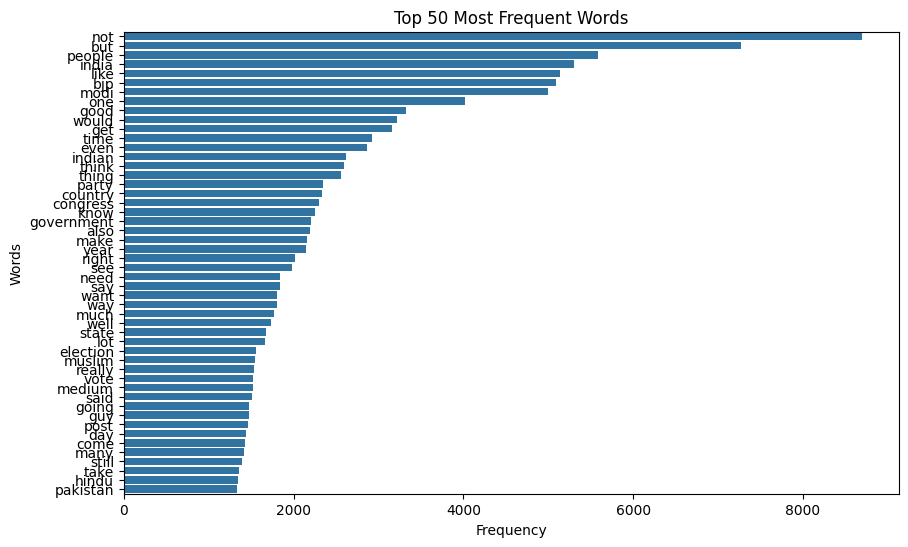

In [ ]:
# Create a function to visualize the top N most frequent words in the dataset
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the comments
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Display the top 50 most frequent words
plot_top_n_words(df, n=50)

In [ ]:
# Create a function to visualize top words with stacked bars showing sentiment distribution
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words with their distribution across sentiment categories."""
    # Count word occurrences by sentiment category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }

            # Increment count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words overall
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for stacked bar chart
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Create stacked horizontal bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()
    plt.show()